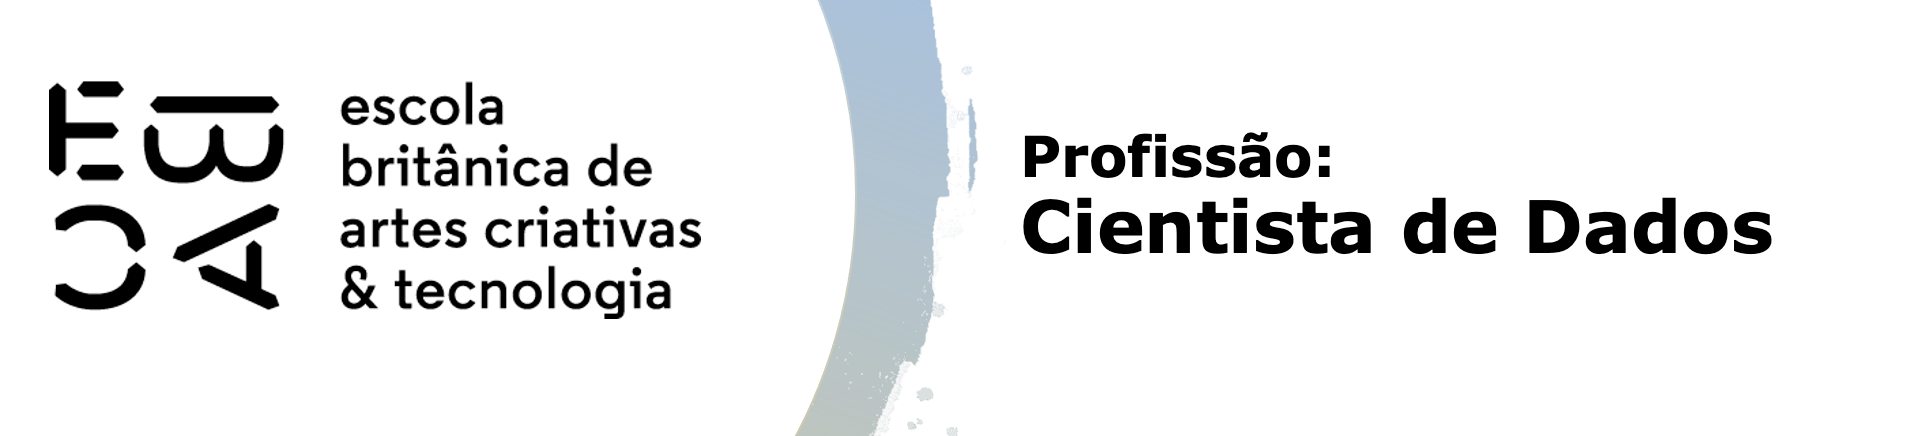

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns

In [16]:
import scipy.stats as st

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

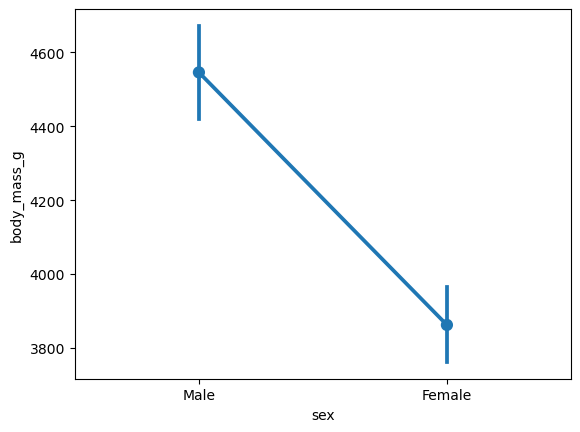

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [10]:
pg.groupby('sex')['body_mass_g'].var().mean()**.5

729.4328134642673

In [14]:
pg.groupby('sex')['body_mass_g'].mean()

sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64

In [17]:
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**.5
Média_female = pg.groupby('sex')['body_mass_g'].mean()['Female']
Média_male = pg.groupby('sex')['body_mass_g'].mean()['Male']

diferença = Média_female - Média_male # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')


diferença: -683.41
desvio padrão: 729.43
erro padrão: 326.21
estatística do teste: -2.09
região crítica: 1.73 ou mais
p-value: 0.97471 ou mais


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,73 e inf é de 5,00%


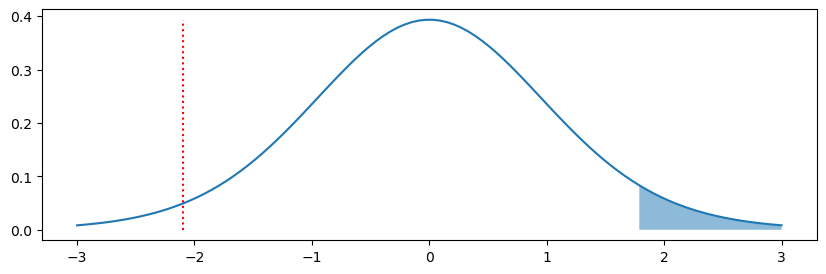

In [22]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, 18)

# low = início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [40]:
pg.groupby(['species','sex'])['body_mass_g'].mean()

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64

## 1º Adelie

In [50]:
pg.groupby(['species','sex'])['body_mass_g'].var()[0:2]

species  sex   
Adelie   Female     72565.639269
         Male      120278.253425
Name: body_mass_g, dtype: float64

In [58]:
pg.groupby(['species','sex'])['body_mass_g'].mean()[0:2]

species  sex   
Adelie   Female    3368.835616
         Male      4043.493151
Name: body_mass_g, dtype: float64

In [61]:
desvpad = pg.groupby(['species','sex'])['body_mass_g'].var()[0:2].mean()**.5
adelie_female = pg.groupby(['species','sex'])['body_mass_g'].mean()[0:2][0]
adelie_male = pg.groupby(['species','sex'])['body_mass_g'].mean()[0:2][1]

diferença = adelie_female - adelie_male # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)     # p-value: a menor significância para a qual rejeitamos o teste
print('ADELIE \n')
print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')


ADELIE 

diferença: -674.66
desvio padrão: 310.52
erro padrão: 138.87
estatística do teste: -4.86
região crítica: 1.73 ou mais
p-value: 0.99994 ou mais


## 2º Chinstrap

In [64]:
pg.groupby(['species','sex'])['body_mass_g'].var()[2:4]

species    sex   
Chinstrap  Female     81415.441176
           Male      131143.605169
Name: body_mass_g, dtype: float64

In [65]:
pg.groupby(['species','sex'])['body_mass_g'].mean()[0:2]

species  sex   
Adelie   Female    3368.835616
         Male      4043.493151
Name: body_mass_g, dtype: float64

In [66]:
desvpad = pg.groupby(['species','sex'])['body_mass_g'].var()[2:4].mean()**.5
chinstrap_female = pg.groupby(['species','sex'])['body_mass_g'].mean()[2:4][0]
chinstrap_male = pg.groupby(['species','sex'])['body_mass_g'].mean()[2:4][1]

diferença = chinstrap_female - chinstrap_male # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)     # p-value: a menor significância para a qual rejeitamos o teste
print('ADELIE \n')
print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')


ADELIE 

diferença: -411.76
desvio padrão: 326.01
erro padrão: 145.79
estatística do teste: -2.82
região crítica: 1.73 ou mais
p-value: 0.99438 ou mais


## 3º Gentoo

In [68]:
 pg.groupby(['species','sex'])['body_mass_g'].var()[4:6]

species  sex   
Gentoo   Female    79286.335451
         Male      98068.306011
Name: body_mass_g, dtype: float64

In [69]:
pg.groupby(['species','sex'])['body_mass_g'].mean()[4:6]

species  sex   
Gentoo   Female    4679.741379
         Male      5484.836066
Name: body_mass_g, dtype: float64

In [70]:
##### desvpad = pg.groupby(['species','sex'])['body_mass_g'].var()[4:6].mean()**.5
gentoo_female = pg.groupby(['species','sex'])['body_mass_g'].mean()[4:6][0]
gentoo_male = pg.groupby(['species','sex'])['body_mass_g'].mean()[4:6][1]

diferença = gentoo_female - gentoo_male # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)     # p-value: a menor significância para a qual rejeitamos o teste
print('ADELIE \n')
print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')


ADELIE 

diferença: -805.09
desvio padrão: 326.01
erro padrão: 145.79
estatística do teste: -5.52
região crítica: 1.73 ou mais
p-value: 0.99998 ou mais
